# Model Comparisions

In [27]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, minmax_scale, MaxAbsScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression

# Support vector machine linear classifier
from sklearn.svm import SVC
import joblib

from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [28]:
# Define a decode function
def decode(datum):
    return np.argmax(datum)

def decodeResults(encoded_predictions):
    labeled_predictions =[]
    for i in range(encoded_predictions.shape[0]):
        decoded_datum = decode(encoded_predictions[i])
        labeled_predictions.append(decoded_datum)
    return labeled_predictions

def reshapeResults(predictions):
    return predictions.reshape(-1,1)

def convertToBinary(predictions):
    binary = []
    for prediction in predictions:
        if (prediction == 'buff'):
            binary.append(0)
        else:
            binary.append(1)
    return binary

In [29]:
def scatterPlot(index, population1, population2, label1, label2, title, ylabel):
    # Scatter Plot of Data
    plt.figure(figsize=(15,5))
    plt.subplot(1,1,1)
    plt.scatter(index, population1, marker='+', color='g', label=label1)
    plt.scatter(index, population2, marker='x', color='r', label=label2)
    plt.title(title,color='k', size=14, weight='bold')
    plt.xlabel("index")
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(alpha=0.5)

# Function to split and encode the data

In [30]:
def splitData (X, y, iteration):
    
    X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=iteration)
    
    # Apply the MinMax Scaler
    X_scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    # Label encode the dependent variable, then Hot encode it
    label_encoder = LabelEncoder()
    label_encoder.fit(y_train)
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    y_train_one_hot = to_categorical(y_train_encoded)
    y_test_one_hot = to_categorical(y_test_encoded)

    return X_train_scaled, X_test_scaled, X_test, y_train_one_hot, y_test_one_hot, y_test, y_test_encoded

# Function to return score of each model

In [31]:
def scoreModels(X_test_scaled, X_test, y_test_one_hot, y_test, y_test_encoded):

    NN_loss, NN_score = NN.evaluate(X_test_scaled, y_test_one_hot)
#     print(f' score {NN_score}')

    LR_score = LR.score(X_test_scaled, y_test_encoded)
#     print(f" score {LR_score}")

    SVM_score = SVM.score(X_test_scaled, y_test_encoded)
#     print(f" score {SVM_score}")

    KNN_score = KNN.score(X_test_scaled, y_test_one_hot)
#     print(f" score {KNN_score}")

    RF_score = RF.score(X_test, y_test)
#     print(f" score {RF_score}")
    
    return NN_score, LR_score, SVM_score, KNN_score, RF_score


# Function to collected predictions from models

In [32]:
def runPredictions(X_test_scaled):
    
    # Random Forests
    RF_predict = RF.predict(X_test_scaled)
    
    # K Nearest Neighbor
    KNN_predict = KNN.predict(X_test_scaled)
    
    # Support Vector Machines
    SVM_predict = SVM.predict(X_test_scaled)
    
    # Logistic Regression
    LR_predict = LR.predict(X_test_scaled)
    
#     not needed any longer???
#         # Convert string result to 0, 1 to match other models
#         LR_predict=[]
#         for i in range(len(LR_pred)):
#             if (LR_pred[i] == 'buff'):
#                 LR_prd= 0
#             else:
#                 LR_prd=1
#             LR_predict.append(LR_prd)
    
    # Neural Network
    NN_predict = NN.predict(X_test_scaled)
    
    # First we need to ensure the data is in the correct format
    # NOTE:  SVM_predict, LR_predict and y_test_encoded

#     # y_test only requires label, no index 
#     y_test_label = y_test

    # Need to convert from buff and sick to 1 and 0
    RF_prediction = convertToBinary(RF_predict)

    # Need to decode results
    KNN_prediction = decodeResults(KNN_predict)
    NN_prediction = decodeResults(NN_predict)
    
    return RF_prediction, KNN_prediction, NN_prediction, SVM_predict, LR_predict

## Load data

In [33]:
df = pd.read_csv('../ETL/cleveland_clean.csv')
df.head()

,age,sex,chestPain,trestBps,cholesterol,bloodSugar,ecg,maxHeartRate,exerciseInducedAngina,oldPeak,slope,vesselsColored,thal,buff
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff


In [34]:
#  reformat the data to replicate data used to create models
    X = df.drop('buff', axis =1)
    y = df['buff']
    X['vesselsColored']=X['vesselsColored'].astype(str)
    X=pd.get_dummies(X)

# Load Models

In [35]:

# Random Forests
RF = joblib.load('tree.sav')

# K Nearest Neighbors
KNN = joblib.load('KNN.sav')

# Support Vector Machines
SVM = joblib.load('SVM.sav')

# Logistic Regression
LR = joblib.load('LR.sav')

# Neural Network
NN = load_model("NeuralNetwork.h5")


# Loop to iterate different splits of data

In [36]:
loops = 5
scoresDF=pd.DataFrame(columns = ['Neural Network', 'Logistic Regression', 'SVM', 'KNN', 'Random Forest'])

for i in range(1,loops+1,1):
    #split the data
    X_train_scaled, X_test_scaled, X_test, y_train_one_hot, y_test_one_hot, y_test, y_test_encoded=splitData(X,y,i)
    
    #collect score of each model
    NN_score, LR_score, SVM_score, KNN_score, RF_score=scoreModels(X_test_scaled, X_test, y_test_one_hot, y_test, y_test_encoded)
    
    loopScores=pd.Series([NN_score, LR_score, SVM_score, KNN_score, RF_score], index=scoresDF.columns)

    scoresDF=scoresDF.append(loopScores, ignore_index=True)
    
    
    #collect predictions for each model
#   RF_prediction, KNN_prediction, NN_prediction, SVM_predict, LR_predict=runPredictions(X_test_scaled)

scoresDF.head()

74/74 [==============================] - 0s 43us/sample - loss: 0.2725 - acc: 0.9054


,Neural Network,Logistic Regression,SVM,KNN,Random Forest
0,0.878378,0.851351,0.864865,0.851351,0.972973
1,0.945946,0.918919,0.918919,0.918919,0.959459
2,0.878378,0.824324,0.837838,0.824324,0.972973
3,0.878378,0.851351,0.864865,0.851351,0.959459
4,0.905405,0.864865,0.864865,0.891892,0.959459


//anaconda3/envs/PythonWebMongo/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


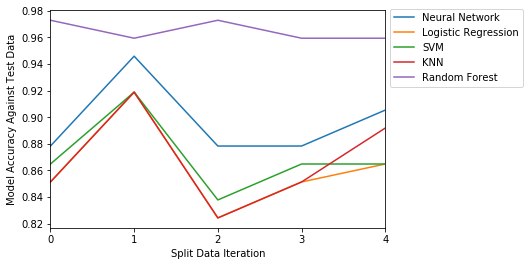

In [37]:
# plot the scores
scoresDF.plot()
x_tickMarks=[x for x in range(loops)]
plt.ylabel('Model Accuracy Against Test Data')
plt.xlabel('Split Data Iteration')
plt.xticks(x_tickMarks)
ax=plt.subplot(111)
ax.legend(bbox_to_anchor=(1,1.03))

# Zip all Predictions into a Single Data Frame

In [38]:
results = pd.DataFrame(list(zip(y_test_label, y_test_encoded, SVM_predict, LR_predict, RF_prediction, KNN_prediction, NN_prediction)), 
                       columns = ['Label','Actual','SVM','LR', 'RF', 'KNN', 'NN'])
results

NameError: name 'y_test_label' is not defined

# Add a Column to Vote for the Final Prediction

In [ ]:
results['Vote Sum'] = (results['RF'] + results['KNN'] + results['SVM'] + results['LR'] + results['NN'])
results['Vote Majority'] = np.where(results['Vote Sum'] >= 3, 1, 0)
results['Vote Conservative'] = np.where(results['Vote Sum'] > 0, 1, 0)
results['SVM Result'] = results['Actual'] - results['SVM']
results['LR Result'] = results['Actual'] - results['LR']
results['RF Result'] = results['Actual'] - results['RF']
results['KNN Result'] = results['Actual'] - results['KNN']
results['NN Result'] = results['Actual'] - results['NN']
results['Majority Result'] = results['Actual'] - results['Vote Majority']
results['Conservative Result'] = results['Actual'] - results['Vote Conservative']
results

# Determine Whether a Consensus is Better than a Single Model

In [ ]:
results.sum()

In [ ]:
svm_final = results['SVM Result'].value_counts()
lr_final = results['LR Result'].value_counts()
rf_final = results['RF Result'].value_counts()
knn_final = results['KNN Result'].value_counts()
nn_final = results['NN Result'].value_counts()
majority_final = results['Majority Result'].value_counts()
conservative_final = results['Conservative Result'].value_counts()
labels = ['Correct', 'False Positive (Incorrectly Found Sick)', 'False Negative (Incorrectly Found Healthy)']
summary = pd.DataFrame(list(zip(labels, svm_final, lr_final, rf_final, knn_final, 
                                nn_final, majority_final, conservative_final)), 
                                columns = ['Result','SVM', 'LR', 'RF', 'KNN', 'NN', 'Majority Vote', 'Conservative Votes'])
summary = summary.set_index('Result')

summary.loc['Model Scores'] = [SVM_score, LR_score, RF_score, KNN_score, NN_score, 'N/A', 'N/A']
summary